
# Separando e normalizando os dados

In [61]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(31)
versao_tensorflow = tf.__version__
print(f'Tensorflow instalado na versão: {versao_tensorflow}')

Tensorflow instalado na versão: 2.16.1


dados de doença cardiaca

In [63]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]
target = doenca_cardiaca.targets
target = (target > 0) * 1

Note: you may need to restart the kernel to use updated packages.


In [64]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [66]:
df_cp = pd.get_dummies(X['cp'], prefix='cp')
X = X.drop('cp', axis=1)
X = X.join(df_cp)

In [68]:
entrada = tf.constant(X, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

Chegou o momento de dividir os dados em treino e teste. Para fazer isso, vamos usar a biblioteca Sklearn. Dentro dela, temos uma função específica para fazer essa divisão. Vamos importar isso na célula seguinte, adicionando from sklearn.model_selection import train_test_split.

Na próxima linha do código, na mesma célula, vamos separar os dados em treino e teste. Vamos criar nosso X de treino, nosso y de treino, nosso X de teste e o Y de teste. Vamos precisar de variáveis para criar isso. Então, vamos colocar X_treino, X_teste, y_treino, y_teste.

Vamos adicionar um sinal de igual e chamar essa função que foi importada acima com um train_test_split(). Entre os parênteses, vamos informar nossa entrada, mas precisamos deixá-la como um .numpy() para que seja entendida corretamente e não fique no formato de tensor.

À sua direita, também vamos passar nosso y, escrevendo y.numpy(). à direita deste, podemos definir alguns parâmetros. Um deles é qual vai ser o tamanho do nosso conjunto de teste. Podemos definir, por exemplo, 20% dos dados separados para teste. Para definir isso, podemos colocar test_size = 0.2.

Adicionaremos uma vírgula e pressionaremos "Enter" para descer uma linha e evitar que a linha de código fique muito longa. Na nova linha, podemos usar uma estratégia que é muito útil, o stratify. Se trata de um parâmetro para o qual vamos passar o y, permitindo que ele mantenha a quantidade de exemplos de 0s e 1s no nosso y, tanto no treino quanto no teste.

Isso impede que haja problemas como ter mais exemplos de pessoas com doença cardíaca em uma coisa, e menos na outra. Isso facilita no processo de classificação. Para adicionar essa estratégia, vamos inserir stratify=y.numpy().

A última coisa que vamos colocar entre os parênteses do train_test_split() é um random state, porque isso é feito de forma aleatória. Para garantir a reprodutibilidade nesse caso, vamos colocar um valor para que você execute em sua máquina e isso aconteça da mesma forma. Então, vamos colocar random_state = e um número aleatório: 4321.

In [69]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(entrada.numpy(), y.numpy(), test_size=0.2,
stratify=y.numpy(), random_state=4321)


Vamos executar esse código, e estará feito. Agora, a ideia é normalizar esses dados, ao invés de normalizar antes de separar em treino e teste, como tínhamos feito antes. Dessa vez, vamos fazer da forma mais adequada.

Já temos o StandardScaler importado na primeira célula. A ideia é começar criando um objeto que vai receber a classe que vai fazer isso. Para isso, na próxima célula, vamos criar um scaler = StandardScaler().

Para evitar o vazamento de dados ao fazer esse processo de normalização, vamos usar somente os dados de treino para fazer o fit e normalizar. Vamos descer uma linha na mesma célula e colocar X_treino = scaler.fit_transform(X_treino). Feito isso, podemos transformar os dados de teste. Desceremos uma linha em relação à anterior e vamos inserir X_teste = scaler.transform(X_teste).

Em seguida, precisamos converter X_treino, X_teste e Y no tipo tensor, como temos o costume de fazer desde o começo. Na próxima linha, vamos fazer converter adicionando X_treino = tf.constant(X_treino, dtype=tf.float32).

Vamos fazer isso para todos. Para o X_teste, vamos descer para a próxima linha e inserir X_teste = tf.constant(X_teste, dtype=tf.float32). Para o y_treino, vamos descer outra linha e inserir y_treino = tf.constant(y_treino, dtype=tf.float32). Por fim, desceremos mais um alinha e adicionaremos o último, y_teste = tf.constant(y_teste, dtype=tf.float32).

In [71]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

X_treino = tf.constant(X_treino, dtype=tf.float32)
X_teste = tf.constant(X_teste, dtype=tf.float32)
y_treino = tf.constant(y_treino, dtype=tf.float32)
y_teste = tf.constant(y_teste, dtype=tf.float32)


Temos tudo preparado e vamos fazer o gradiente funcionar para ver o que acontece.

Adicionando o gradiente
Antes de tudo, precisamos sempre refazer os pesos. Na célula vazia seguinte, vamos fazer o tf.random.set_seed(). Entre os parênteses, vamos dar um valor igual a 31, para manter como fizemos antes.

In [ ]:
tf.random.set_seed(31)


Pularemos uma linha e criaremos os pesos e o vies (viés), um em cada linha. O pesos será criado com tf.Variable(), e entre seus parênteses vamos colocar o tf.random.normal(). Entre os parênteses deste, por sua vez, vamos abrir colchetes, entre os quais colocaremos a quantidade_features criada anteriormente.

Vamos adicionar uma vírgula e adicionar o 1 também. À direita dos parênteses de tf.random.normal(), vamos colocar o name que será igual a pesos.

Na linha do vies, ele será igual a tf.Variable(). Entre os parênteses, vamos colocar o mesmo que antes: tf.random.normal(). Entre os parênteses deste, vamos abrir colchetes e colocar o número 1 dentro. à direita de tf.random.normal(), vamos dar o nome inserindo um name = vies.

Na verdade, não temos a quantidade_features ainda. Vamos criar essa variável acima das linhas de pesos e vies, para dar tudo certo. Vamos colocar a quantidade_features, que será igual ao x_treino.shape[] e passar dentro dos colchetes o número 1, para pegar a quantidade de colunas.



In [72]:
quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')


Também precisamos da nossa calculadora de perda. Para adicioná-la, vamos descer mais uma linha e inserir calculadora_perda que será igual ao tf.keras.losses.BinaryCrossentropy().

Além disso, também precisamos do otimizador. Desceremos mais uma linha e adicionaremos um otimizador_treino que será igual ao tf.optimizers.SGD(). Entre seus parênteses, vamos colocar um learning_rate por meio de um learning_rate=0,01.

Na próxima linha, vamos definir a quantidade de épocas, adicionando um QUANTIDADE_EPOCAS será igual a 1.000.

In [73]:
calculadora_perda = tf.keras.losses. BinaryCrossentropy()
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
QUANTIDADE_EPOCAS = 1000


Descendo mais duas linhas, vamos armazenar as perdas em uma lista, para ficar mais organizado. Vamos criar uma lista perdas = [], que será vazia.

Desceremos duas linhas e faremos aquele for epoca in range(). Entre parênteses, vamos informar QUANTIDADE_EPOCAS. Já à direita deles, vamos adicionar dois pontos e desceremos para a próxima linha.

Dentro do for, vamos armazenar todas as informações no GradientTape, adicionando um with tf.GradientTape () as tape. No final, adicionaremos dois pontos e desceremos para a próxima linha.

Dentro do with, calcularemos a probabilidade e o custo, adicionando probabilidade que será igual ao tf.sigmoid(). Entre seus parênteses, vamos informar neuronio(), e entre os parênteses deste, o X_treino.

Por enquanto, faltará a função neuronio(), presente em outro notebook. Posteriormente, a copiaremos e adicionaremos neste.

Na próxima linha, vamos colocar o custo também. Ele será igual à calculadora_perda(), e vamos colocar entre estes parênteses o y_treino e a probabilidade que está sendo calculada na linha acima e que serve para comparar as duas coisas e calcular perdas e custos.

Vamos pular uma linha para sair do with e, ainda dentro do for, vamos adicionar os gradientes, que serão iguais ao tape.gradient(). Entre seus parênteses, vamos passar o custo da linha de cima, vírgula, abrir colchetes e passar entre eles os pesos e o vies.

Na linha de baixo, vamos aplicar os gradientes com apply.gradients(). Para isso, vamos chamar o otimizador_treino.apply_gradients(). Entre seus parênteses, vamos passar a função zip(), e entre os parênteses deste, vamos inserir os gradientes, vírgula, e passar entre colchetes os pesos, vírgula, vies.

Após ter feito tudo isso, vamos armazenar as nossas perdas nessa lista. Para isso, pularemos uma linha e, ainda dentro do for, vamos colocar perdas.append() e vamos passar entre seus parênteses o custo.numpy().

Por fim, podemos exibir os resultados a cada 100 épocas. Para isso, vamos pular outra linha e, ainda dentro do for, colocar o if, passando entre parênteses o epoca + 1. À direita, vamos colocar o símbolo de porcentagem, o número 100 == 0. Com isso, vamos imprimir essa época quando o resto da divisão por 100 for zero.

Vamos adicionar dois pontos, acessar a próxima linha e colocar um print(). Entre seus parênteses, vamos colocar uma fstring com f'' e adicionar entre suas aspas Época:, um espaço, um par de chaves e entre elas, a nossa epoca+1. À direita do par de chaves, vamos adicionar uma vírgula e colocar o Custo:, um espaço, e adicionar, entre chaves, o custo.numpy().

Agora, falta a função do neurônio, que pode ser consultada abaixo. Vamos copiá-la e colá-la embaixo da linha vies = tf.Variable(tf.random.normal([1]), name='vies'), na qual definimos os pesos e viés. Nessa função, temos o def_neuronio que recebe o x. Multiplicamos x pelos pesos e adicionamos o viés.

In [82]:
tf.random.set_seed(31)

quantidade_features = X_treino.shape[1]
pesos = tf.Variable(tf.random.normal([quantidade_features, 1]), name='pesos')
vies = tf.Variable(tf.random.normal([1]), name='vies')

def neuronio(x):
    z = tf.add(tf.matmul(x, pesos), vies)
    return z

calculadora_perda = tf.keras.losses. BinaryCrossentropy()
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)
QUANTIDADE_EPOCAS = 1000

perdas = []

for epoca in range(QUANTIDADE_EPOCAS):
    with tf.GradientTape() as tape:
        probabilidade = tf.sigmoid(neuronio(X_treino))
        custo = calculadora_perda(y_treino, probabilidade)
        
    gradientes = tape.gradient(custo, [pesos, vies])
    otimizador_treino.apply_gradients(zip(gradientes, [pesos, vies]))
    
    perdas.append(custo.numpy())
    
    if (epoca + 1) % 100 == 0:
        print (f'Época: {epoca+1}), Custo: ({custo.numpy()}')


Época: 100), Custo: (1.1161863803863525
Época: 200), Custo: (0.9429414868354797
Época: 300), Custo: (0.8417730927467346
Época: 400), Custo: (0.7737217545509338
Época: 500), Custo: (0.721126139163971
Época: 600), Custo: (0.6769370436668396
Época: 700), Custo: (0.638964831829071
Época: 800), Custo: (0.6073909401893616
Época: 900), Custo: (0.5830886960029602
Época: 1000), Custo: (0.5660953521728516


Vamos rodar para ver se dá certo. Então, está rodando e já está imprimindo o custo a cada época. Começamos com o custo, na época 100, de 1.1 e indo para 0.94, 0.84, 0.77 e vai descendo até chegar a 0.56.

Podemos até plotar um gráfico para ver como fica isso. Para plotar, vamos precisar importar a biblioteca matplotlib. Faremos isso na próxima célula vazia, com o comando abaixo.



In [84]:
import matplotlib.pyplot as plt


Pularemos uma linha e vamos dar um plt.plot() e vamos passar entre parênteses a lista perdas que foi criada mais acima.

Podemos dar um título aos eixos para ficar mais organizado. Para isso, na próxima linha, vamos adicionar plt.title() que terá entre os parênteses o texto "Perda por época" entre aspas simples. Na próxima linha, intitularemos os eixos com plt.xlabel(). O eixo X será a época, portanto, vamos adicionar entre parênteses o texto "Época" entre aspas simples.

Na próxima linha, teremos o eixo y como "Perda", ou seja, plt.ylabel('Perda'). Por fim, desceremos outra linha, na qual vamos adicionar um plt.show() para exibir o gráfico.

É interessante deixar o eixo y começando em zero, para não distorcer o resultado. Entre o ylabel e o show, podemos colocar um plt.ylim() e definir entre parênteses o intervalo de zero até 2 (0,2) para ver como fica.

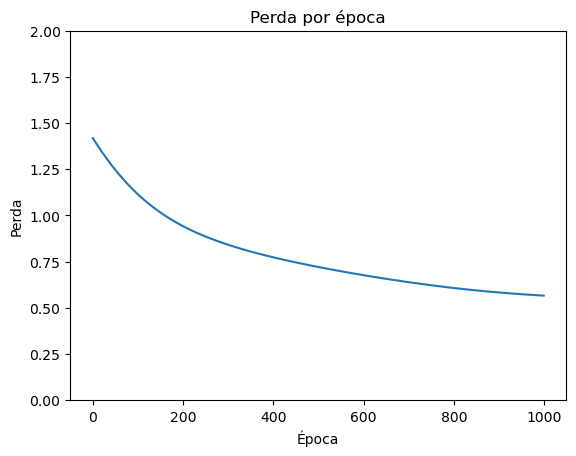

In [85]:
import matplotlib.pyplot as plt
plt.plot(perdas)
plt.title('Perda por época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim(0,2)
plt.show()


Vamos pensar o seguinte: usamos um learning_rate igual a 0.01. O que aconteceria com o formato que estamos vendo nesse gráfico se testássemos diferentes taxas, tanto mais baixas quanto mais altas? No próximo vídeo vamos testar esses casos.